In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [10]:
data = pd.read_csv("My Drive/Colab Notebooks/quasar_train.csv", header=-1).to_numpy()

(201, 450)


[[ 2.51339906e+00]
 [-9.81122145e-04]]


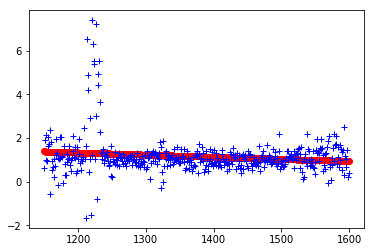

In [15]:
x_linreg = np.append(np.ones((data[0,:].shape[0], 1)), data[0,:].reshape(data[0,:].shape[0], 1), axis=1)
y1 = data[1,:].reshape(data[1,:].shape[0], 1)

theta = np.linalg.inv(x1.T@x1)@x1.T@y1

pred = x1@theta
plt.plot(x1[:,1], pred, 'ro')
plt.plot(x1[:,1], y1, 'b+')
print(theta)
plt.show()

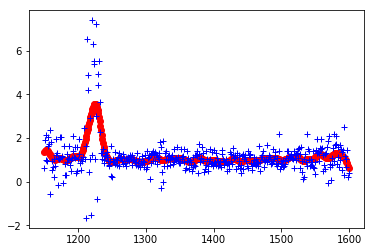

In [19]:
# Define matrix W that can change as x changes, with tau = 5
x_localreg = x_linreg

def W(x, tau):
  w = []
  for i in range(x_localreg.shape[0]):
    w.append(math.exp(-((x_localreg[i,:]-x).T@(x_localreg[i,:]-x))/(2*tau**2)))
  return np.diag(np.array(w))

def lwr(tau):
  theta_lwr = []
  for i in range(x_localreg.shape[0]):
    w = W(x_localreg[i,:], tau)
    theta_lwr.append(np.linalg.inv(x_localreg.T@w@x_localreg)@x_localreg.T@w@y1)

  pred = []
  for i in range (x_localreg.shape[0]):
    pred.append(np.asscalar(x_localreg[i,:]@theta_lwr[i]))

  for i in range (x_localreg.shape[0]):
    plt.plot(x_localreg[i,1], pred[i], 'ro')

  plt.plot(x_localreg[:,1], y1, 'b+')
  plt.show()

lwr(5)

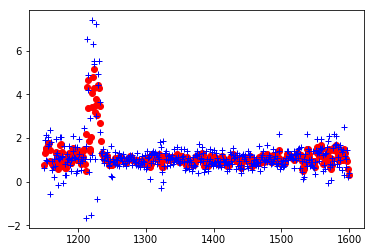

In [20]:
# tau = 1
lwr(1)

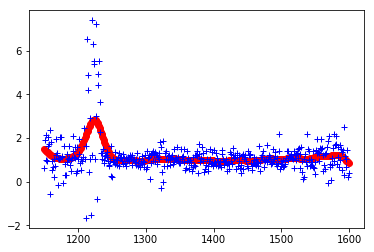

In [21]:
# tau = 10
lwr(10)

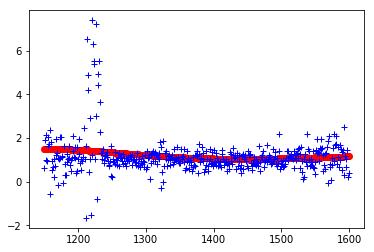

In [22]:
# tau = 100
lwr(100)

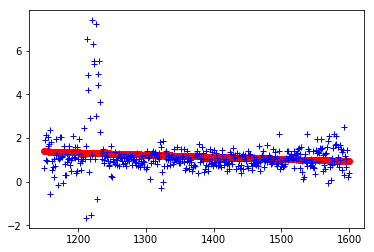

In [23]:
# tau = 1000
lwr(1000)

When tau decreases, the curve is more adaptive to the shape of real data (maybe resulting in some non-linear curve). When tau increases, the curve becomes more linear.